## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# **Import Libraries**

In [875]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
%matplotlib inline

**Loading Dataframe**

In [876]:
basic_df = pd.read_csv(r'C:\Users\Sylvia\moringa_labs\project1\dsc_project\zippedData\imdb.title.basics.csv.gz')
rating_df = pd.read_csv(r'C:\Users\Sylvia\moringa_labs\project1\dsc_project\zippedData\imdb.title.ratings.csv.gz')
gross_df = pd.read_csv(r'C:\Users\Sylvia\moringa_labs\project1\dsc_project\zippedData\bom.movie_gross.csv.gz')
tn_budget_df = pd.read_csv(r'C:\Users\Sylvia\moringa_labs\project1\dsc_project\zippedData\tn.movie_budgets.csv.gz')


**Understanding the datasets**
##### Basic.csv dataset

We are getting to understand our dataset by knowing the datatypes,percentages of null values and presence of duplicates 

In [877]:
basic_df.info()
basic_df.head()
basic_df.shape
basic_df.duplicated().value_counts()
basic_df.isnull().sum()* 100/len(basic_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


tconst              0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

##### Rating.csv dataset 

In [878]:
rating_df.info()
rating_df.head()
rating_df.shape
rating_df.isnull().sum()* 100/len(rating_df)
rating_df.duplicated().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


False    73856
dtype: int64

##### Gross.csv dataset

In [879]:
gross_df.info()
gross_df.head()
gross_df.shape
gross_df.duplicated().value_counts()
gross_df.isnull().sum()* 100/len(gross_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

##### Tn.movie budget csv

In [880]:
tn_budget_df.info()
tn_budget_df.head()
tn_budget_df.shape
tn_budget_df.duplicated().value_counts()
tn_budget_df.isnull().sum()* 100/len(tn_budget_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

Making a copy of the dataset 

In [881]:
basic_df2=basic_df.copy()
rating_df2=rating_df.copy()
gross_df2=gross_df.copy()
tn_budget_df2=tn_budget_df.copy()

Cleaning the datasets 

Cleaning the data for basic_df2

we are dropping the original_title since its repetitive and renaming the primary_title to movie_title for clarity 

In [882]:
basic_df2.drop(columns=['original_title'],inplace=True)
basic_df2.rename({'primary_title':'movie_title'}, axis=1, inplace=True)
basic_df2.head()

,tconst,movie_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


Replacing nan values with mode for basic_df2

In [883]:
basic_df2['runtime_minutes'].mode()
basic_df2['runtime_minutes'].fillna(90, inplace=True)
basic_df2.head()

,tconst,movie_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,90.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


Spiltting to find the dominant genre for categorical visualization 

In [884]:
basic_df2['genres'] = basic_df['genres'].str.split(',',expand=True)
basic_df2['genres'].fillna('Unknown',inplace=True)
basic_df2.head()

,tconst,movie_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,Action
1,tt0066787,One Day Before the Rainy Season,2019,114.0,Biography
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,90.0,Comedy
4,tt0100275,The Wandering Soap Opera,2017,80.0,Comedy


Changing data type from float to inter for runtime_minutes 

In [885]:
basic_df2= basic_df2.astype({'runtime_minutes':'int'})
#basic_df2['runtime_minutes']= basic_df2['runtime_minutes'].astype('int32')-alternative way
basic_df2.dtypes

tconst             object
movie_title        object
start_year          int64
runtime_minutes     int32
genres             object
dtype: object

Cleaning the dataset for gross_df2

 Changing data type of foreign gross to inter

In [886]:
gross_df2['foreign_gross']= pd.to_numeric(gross_df['foreign_gross'].str.replace(',', '', regex=True))
 #gross_df['foreign_gross'] = pd.to_numeric(gross_df['foreign_gross'].str.replace(',', '', regex=True))
gross_df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


Dropping nan values and filling 

In [887]:
gross_df2.dropna(axis=0,subset=['domestic_gross','foreign_gross'],inplace=True) 
#gross_df2.dropna(inplace=True) alternative way
#gross_df2.dropna(axis=0,how='any',inplace=True) alternative way
gross_df2['studio'].fillna('Unknown',inplace=True)

Checking the shape after dropping

In [888]:
gross_df2.shape

(2009, 5)

Checking nun values % 

In [889]:
gross_df2.isnull().sum()* 100/len(gross_df)

title             0.0
studio            0.0
domestic_gross    0.0
foreign_gross     0.0
year              0.0
dtype: float64

Reset the indexing of the dataset 

In [890]:
gross_df2.reset_index(drop=True,inplace=True)
gross_df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


Cleaning dataset of tn.moviebudgets

Lets change the datatypes of domestic,budget production and worldwide gross

In [891]:
tn_budget_df2['domestic_gross'] = tn_budget_df2['domestic_gross'].str.replace(r"[$,]", "", regex=True).astype(int)
tn_budget_df2['production_budget'] = tn_budget_df2['production_budget'].str.replace(r"[$,]", "", regex=True).astype(int)
tn_budget_df2["worldwide_gross"] = pd.to_numeric(tn_budget_df2["worldwide_gross"].str.replace(r"[$,]", "", regex=True))

tn_budget_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int32 
 4   domestic_gross     5782 non-null   int32 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int32(2), int64(2), object(2)
memory usage: 226.0+ KB


Separate release date to month,year for better visualization

In [892]:
tn_budget_df2['release_month'] = tn_budget_df2['release_date'].str.split(' ').str[0]
tn_budget_df2['release_year'] = tn_budget_df2['release_date'].str.split(' ').str[-1]
tn_budget_df2 = tn_budget_df2.drop(columns='release_date', axis=0)


tn_budget_df2.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,1,Avatar,425000000,760507625,2776345279,Dec,2009
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,2011
2,3,Dark Phoenix,350000000,42762350,149762350,Jun,2019
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,May,2015
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec,2017


Changing Index

Make the id the index 

In [893]:
tn_budget_df2.set_index('id', inplace=True)
#tn_budget_df2.reset_index(inplace=True) #undoing set index

In [894]:
tn_budget_df2.head()

,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
id,,,,,,
1,Avatar,425000000,760507625,2776345279,Dec,2009
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,2011
3,Dark Phoenix,350000000,42762350,149762350,Jun,2019
4,Avengers: Age of Ultron,330600000,459005868,1403013963,May,2015
5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec,2017


### Merge Tables

Lets join basic_df2 and rating_df2 using inner join 

In [895]:
movie_df= pd.merge(basic_df2, rating_df2, how='inner', on='tconst')
movie_df.head()

,tconst,movie_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175,Action,7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114,Biography,7.2,43
2,tt0069049,The Other Side of the Wind,2018,122,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,90,Comedy,6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80,Comedy,6.5,119


In [896]:
movie_df.head()
movie_df.info()
movie_df.shape
movie_df.duplicated().value_counts()
movie_df.isnull().sum()*100/len(movie_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   movie_title      73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  73856 non-null  int32  
 4   genres           73856 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 4.2+ MB


tconst             0.0
movie_title        0.0
start_year         0.0
runtime_minutes    0.0
genres             0.0
averagerating      0.0
numvotes           0.0
dtype: float64

Merge movies_df to tn_budget
 to show how rating affects production budget and gross incomes.

In [897]:
rating_gross_df = pd.merge(movie_df, tn_budget_df2, how='inner', left_on='movie_title', right_on='movie')
rating_gross_df.info()
rating_gross_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2875 non-null   object 
 1   movie_title        2875 non-null   object 
 2   start_year         2875 non-null   int64  
 3   runtime_minutes    2875 non-null   int32  
 4   genres             2875 non-null   object 
 5   averagerating      2875 non-null   float64
 6   numvotes           2875 non-null   int64  
 7   movie              2875 non-null   object 
 8   production_budget  2875 non-null   int32  
 9   domestic_gross     2875 non-null   int32  
 10  worldwide_gross    2875 non-null   int64  
 11  release_month      2875 non-null   object 
 12  release_year       2875 non-null   object 
dtypes: float64(1), int32(3), int64(3), object(6)
memory usage: 280.8+ KB


,tconst,movie_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,tt0249516,Foodfight!,2012,91,Action,1.9,8248,Foodfight!,45000000,0,73706,Dec,2012
1,tt0326592,The Overnight,2010,88,Unknown,7.5,24,The Overnight,200000,1109808,1165996,Jun,2015
2,tt3844362,The Overnight,2015,79,Comedy,6.1,14828,The Overnight,200000,1109808,1165996,Jun,2015
3,tt0337692,On the Road,2012,124,Adventure,6.1,37886,On the Road,25000000,720828,9313302,Mar,2013
4,tt4339118,On the Road,2014,89,Drama,6.0,6,On the Road,25000000,720828,9313302,Mar,2013


In [898]:
#clean the df:
rating_gross_df.drop(columns=['movie_title', 'numvotes', 'release_year','release_month', 'movie', 'start_year'], inplace=True)
rating_gross_df.reset_index()

,index,tconst,runtime_minutes,genres,averagerating,production_budget,domestic_gross,worldwide_gross
0,0,tt0249516,91,Action,1.9,45000000,0,73706
1,1,tt0326592,88,Unknown,7.5,200000,1109808,1165996
2,2,tt3844362,79,Comedy,6.1,200000,1109808,1165996
3,3,tt0337692,124,Adventure,6.1,25000000,720828,9313302
4,4,tt4339118,89,Drama,6.0,25000000,720828,9313302
...,...,...,...,...,...,...,...,...
2870,2870,tt8680254,90,Drama,9.1,9200000,2684904,4199334
2871,2871,tt8824064,88,Documentary,7.3,400000,655538,655538
2872,2872,tt8976772,92,Documentary,7.3,38000000,31811527,49678401
2873,2873,tt9024106,106,Biography,6.3,6000000,18107621,18107621


In [899]:
rating_gross_df

,tconst,runtime_minutes,genres,averagerating,production_budget,domestic_gross,worldwide_gross
0,tt0249516,91,Action,1.9,45000000,0,73706
1,tt0326592,88,Unknown,7.5,200000,1109808,1165996
2,tt3844362,79,Comedy,6.1,200000,1109808,1165996
3,tt0337692,124,Adventure,6.1,25000000,720828,9313302
4,tt4339118,89,Drama,6.0,25000000,720828,9313302
...,...,...,...,...,...,...,...
2870,tt8680254,90,Drama,9.1,9200000,2684904,4199334
2871,tt8824064,88,Documentary,7.3,400000,655538,655538
2872,tt8976772,92,Documentary,7.3,38000000,31811527,49678401
2873,tt9024106,106,Biography,6.3,6000000,18107621,18107621


### Overall Statistics for movie_df,gross_df2 and tn_budget_df2

In [900]:
movie_df.describe()
#movie_df.describe(include ='all') #inclusive of categorial data

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,73856.000000,73856.000000,7.385600e+04
mean,2014.276132,94.173865,6.332729,3.523662e+03
std,2.614807,197.526503,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,83.000000,5.500000,1.400000e+01
50%,2014.000000,90.000000,6.500000,4.900000e+01
75%,2016.000000,101.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [901]:
gross_df2.describe()

,domestic_gross,foreign_gross,year
count,2.009000e+03,2.009000e+03,2009.000000
mean,4.697311e+07,7.571822e+07,2013.503235
std,8.159966e+07,1.381296e+08,2.598481
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.650000e+05,3.900000e+06,2011.000000
50%,1.650000e+07,1.930000e+07,2013.000000
75%,5.600000e+07,7.590000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [902]:
tn_budget_df2.describe()

,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


### Feature Engineering 

Return on Investment-negative roi means loss.

In [903]:
tn_budget_df2['roi']=(tn_budget_df2['domestic_gross']-tn_budget_df2['production_budget'])/tn_budget_df2['production_budget']*100
tn_budget_df2.head()

#calculate profit 
tn_budget_df2['profit']=tn_budget_df2['domestic_gross']-tn_budget_df2['production_budget']
tn_budget_df2.head()

,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,roi,profit
id,,,,,,,,
1,Avatar,425000000,760507625,2776345279,Dec,2009,78.942971,335507625
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,2011,-41.289850,-169536125
3,Dark Phoenix,350000000,42762350,149762350,Jun,2019,-87.782186,-307237650
4,Avengers: Age of Ultron,330600000,459005868,1403013963,May,2015,38.840250,128405868
5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec,2017,95.640815,303181382


### Correlation Analysis

In [904]:
correlation_matrix = tn_budget_df2.corr()
correlation_matrix

,production_budget,domestic_gross,worldwide_gross,roi,profit
production_budget,1.000000,0.685682,0.748306,-0.048022,0.099742
domestic_gross,0.685682,1.000000,0.938853,0.034693,0.792663
worldwide_gross,0.748306,0.938853,1.000000,0.011918,0.656626
roi,-0.048022,0.034693,0.011918,1.000000,0.087646
profit,0.099742,0.792663,0.656626,0.087646,1.000000


In [905]:
# flattern correlation
sorted_pairs= correlation_matrix.stack()
sorted_pairs.head(50)

# filter and view only strong correlations
strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.5) & (sorted_pairs < 1)].drop_duplicates().sort_values(ascending=False)
strong_pairs



domestic_gross     worldwide_gross    0.938853
                   profit             0.792663
production_budget  worldwide_gross    0.748306
                   domestic_gross     0.685682
worldwide_gross    profit             0.656626
dtype: float64

### Visualize

Correlation Matrix

<AxesSubplot:>

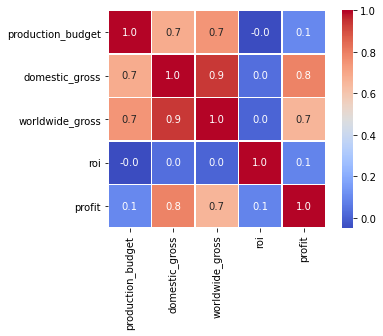

In [906]:
sns.heatmap(correlation_matrix,annot=True,fmt=".1f",
    cmap='coolwarm',cbar=True,square=True,linewidths=0.3)

### Filtering 
the movie_df 

Here to help in visualisation;

In [907]:
movie_df.head()

,tconst,movie_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175,Action,7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114,Biography,7.2,43
2,tt0069049,The Other Side of the Wind,2018,122,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,90,Comedy,6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80,Comedy,6.5,119


Year with the highest voting

In [909]:
movie_df.rename({'start_year':'year'}, axis=1, inplace=True)
movie_df.columns

Index(['tconst', 'movie_title', 'year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')

In [910]:
movie_df.groupby('year')['numvotes'].mean().sort_values(ascending=False)

year
2010    4488.480418
2013    4460.397622
2011    4431.113953
2012    4261.238932
2014    4107.310238
2015    3080.688721
2016    3052.597523
2017    2513.674280
2018    2193.447914
2019    1408.505046
Name: numvotes, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

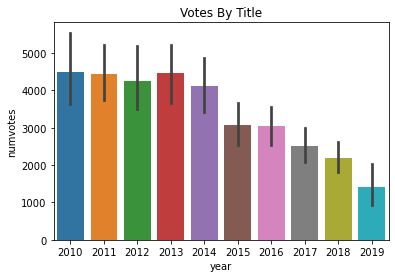

In [911]:
sns.barplot(x='year',y='numvotes',data=movie_df)
plt.title('Votes By Title')
plt.show

Lengthy Movies Titles and Runtime

In [912]:
movie_df.columns

Index(['tconst', 'movie_title', 'year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')

In [913]:
# top10_len = movie_df.nlargest(10,'runtime_minutes')[['movie_title','runtime_minutes']].set_index('movie_title')
top10_len = movie_df.sort_values(by='averagerating', ascending=False).head(10)
top10_len

,tconst,movie_title,year,runtime_minutes,genres,averagerating,numvotes
51109,tt5089804,Fly High: Story of the Disc Dog,2019,65,Documentary,10.0,7
65944,tt7259300,Calamity Kevin,2019,77,Adventure,10.0,6
71577,tt8730716,Pick It Up! - Ska in the '90s,2019,99,Documentary,10.0,5
73616,tt9715646,Renegade,2019,90,Documentary,10.0,20
65755,tt7227500,Ellis Island: The Making of a Master Race in A...,2018,70,Documentary,10.0,6
878,tt10378660,The Dark Knight: The Ballad of the N Word,2018,129,Comedy,10.0,5
64646,tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93,Documentary,10.0,5
9745,tt1770682,Freeing Bernie Baran,2010,100,Crime,10.0,5
702,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52,Documentary,10.0,5
49925,tt4944240,Dog Days in the Heartland,2017,90,Drama,10.0,5


In [919]:
genre_stats = movie_df.groupby('genres').agg(avg_rating=('averagerating', 'mean'),avg_runtime=('runtime_minutes', 'mean'))
top10_genres = genre_stats.sort_values(by='avg_rating', ascending=False).head(10)
top10_genres = top10_genres.drop('Unknown')


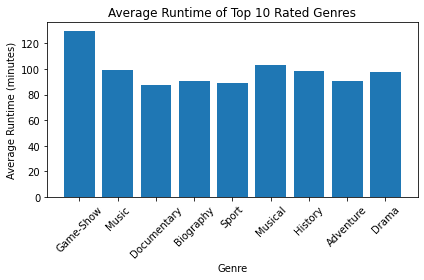

In [920]:

# top10_genres['avg_runtime'].plot(kind='bar',figsize=(10,6))
plt.bar(top10_genres.index,top10_genres['avg_runtime'])
plt.title('Average Runtime of Top 10 Rated Genres')
plt.xlabel('Genre')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


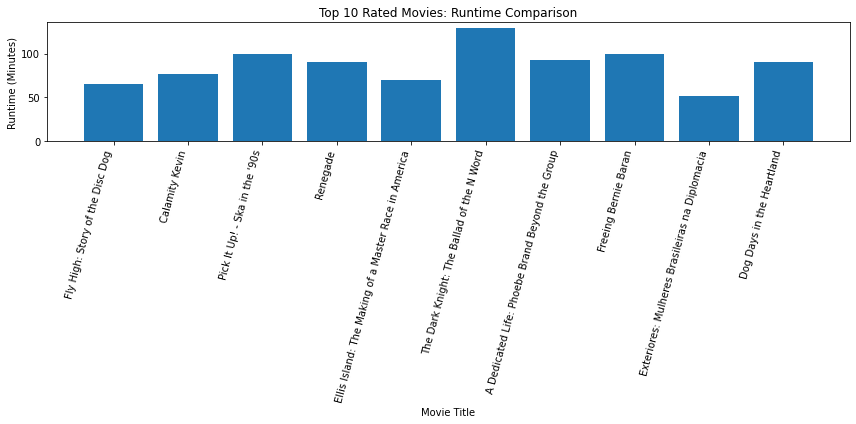

In [ ]:
plt.figure(figsize=(12,6))

plt.bar(top10_len['movie_title'],top10_len['runtime_minutes']
)

plt.xlabel('Movie Title')
plt.ylabel('Runtime (Minutes)')
plt.title('Top 10 Rated Movies: Runtime Comparison')

plt.xticks(rotation=75, ha='right')  # Rotate for readability

plt.tight_layout()
plt.show()

Year With Highest Average Revenue

In [ ]:
gross_df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [ ]:
gross_df2.groupby('year')['domestic_gross'].mean().sort_values(ascending=False)


year
2018    6.222173e+07
2017    5.941676e+07
2016    5.661299e+07
2015    5.655194e+07
2013    5.279425e+07
2012    4.402413e+07
2014    4.336745e+07
2011    3.407478e+07
2010    3.285708e+07
Name: domestic_gross, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

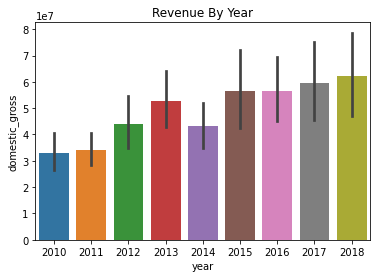

In [ ]:
sns.barplot(x='year',y='domestic_gross',data=gross_df2)
plt.title("Revenue By Year")
plt.show

Let us see the genres that has movies getting produced the most vs ones that are produced the least.

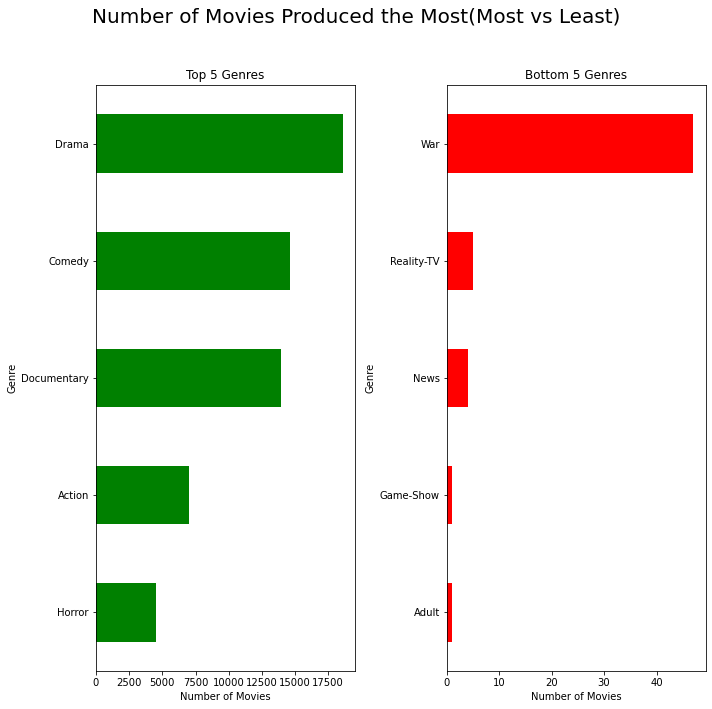

In [ ]:

movie_df['genres'].unique()
genre_counts= movie_df['genres'].value_counts() #drama has most count 
top_genres = genre_counts.head(5).sort_values(ascending=True)
bottom_genres = genre_counts.tail(5).sort_values(ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(10,10))
#Most movies
top_genres.plot(kind='barh', ax=axes[0], color='green')
axes[0].set_title('Top 5 Genres')
axes[0].set_xlabel('Number of Movies')
axes[0].set_ylabel('Genre')

#Least movies
bottom_genres.plot(kind='barh', ax=axes[1], color='red')
axes[1].set_title('Bottom 5 Genres')
axes[1].set_xlabel('Number of Movies')
axes[1].set_ylabel('Genre')

# Main title
fig.suptitle('Number of Movies Produced the Most(Most vs Least)', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Analyze and visualize based on subsets from average_rating. Create a rating categorization of 'Below Average', 'Average', 'Above Average'.

In [ ]:
# create total gross
rating_gross_df['total_gross'] = rating_gross_df['domestic_gross'] +rating_gross_df['worldwide_gross']


In [ ]:
#categorize ratinginto 3 categories
def categorize(averagerating):
    if averagerating < 5:
        return 'Below Average'
    if averagerating < 8:
        return 'Average'
    if averagerating > 7:
        return 'Above Average'
    
rating_gross_df['Rating Category'] = rating_gross_df['averagerating'].apply(categorize)

rating_gross_df.head()


,tconst,runtime_minutes,genres,averagerating,production_budget,domestic_gross,worldwide_gross,total_gross,Rating Category
0,tt0249516,91,Action,1.9,45000000,0,73706,73706,Below Average
1,tt0326592,88,Unknown,7.5,200000,1109808,1165996,2275804,Average
2,tt3844362,79,Comedy,6.1,200000,1109808,1165996,2275804,Average
3,tt0337692,124,Adventure,6.1,25000000,720828,9313302,10034130,Average
4,tt4339118,89,Drama,6.0,25000000,720828,9313302,10034130,Average


Create dfs for each category

In [ ]:
below_avg_df = rating_gross_df[rating_gross_df['Rating Category']=='Below Average']
above_avg_df = rating_gross_df[rating_gross_df['Rating Category']=='Above Average']
avg_df = rating_gross_df[rating_gross_df['Rating Category']=='Average']
above_avg_df.head()

,tconst,runtime_minutes,genres,averagerating,production_budget,domestic_gross,worldwide_gross,total_gross,Rating Category
20,tt0435761,103,Adventure,8.3,200000000,415004880,1068879522,1483884402,Above Average
48,tt9906218,84,Documentary,8.1,95000000,81562942,165720921,247283863,Above Average
69,tt0770802,102,Documentary,8.5,4000000,2672413,5966671,8639084,Above Average
78,tt0790636,117,Biography,8.0,5000000,27298285,60611845,87910130,Above Average
101,tt0816692,169,Adventure,8.6,165000000,188017894,666379375,854397269,Above Average


Plot hists for gross and another to see production budget

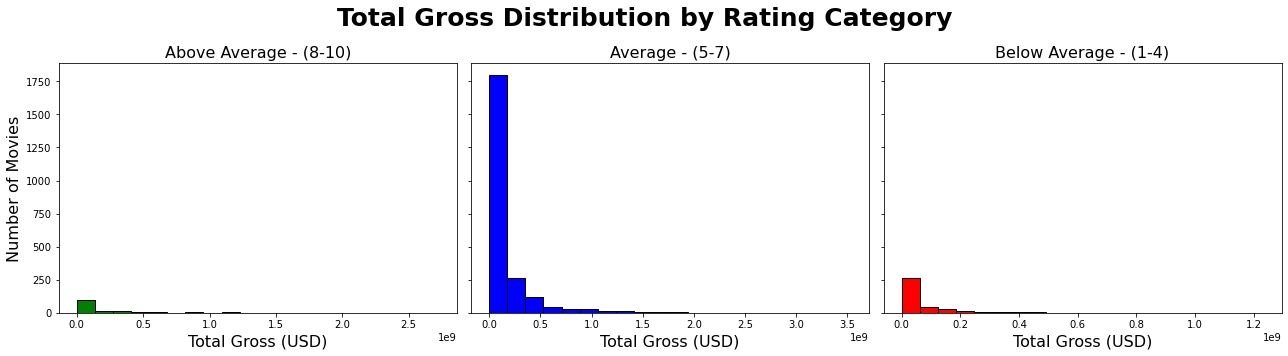

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=True)

# Above Average
axes[0].hist(above_avg_df['total_gross'], bins=20, color='green', edgecolor='black')
axes[0].set_title('Above Average - (8-10)', fontsize=16)
axes[0].set_xlabel('Total Gross (USD)', fontsize=16)
axes[0].set_ylabel('Number of Movies',fontsize=16)

# Average
axes[1].hist(avg_df['total_gross'], bins=20, color='blue', edgecolor='black')
axes[1].set_title('Average - (5-7)', fontsize=16)
axes[1].set_xlabel('Total Gross (USD)', fontsize=16)

# Below Average
axes[2].hist(below_avg_df['total_gross'], bins=20, color='red', edgecolor='black')
axes[2].set_title('Below Average - (1-4)', fontsize=16)
axes[2].set_xlabel('Total Gross (USD)', fontsize=16)

fig.suptitle('Total Gross Distribution by Rating Category', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

We see average rated movies get more movies that cost alot less are gighly funded

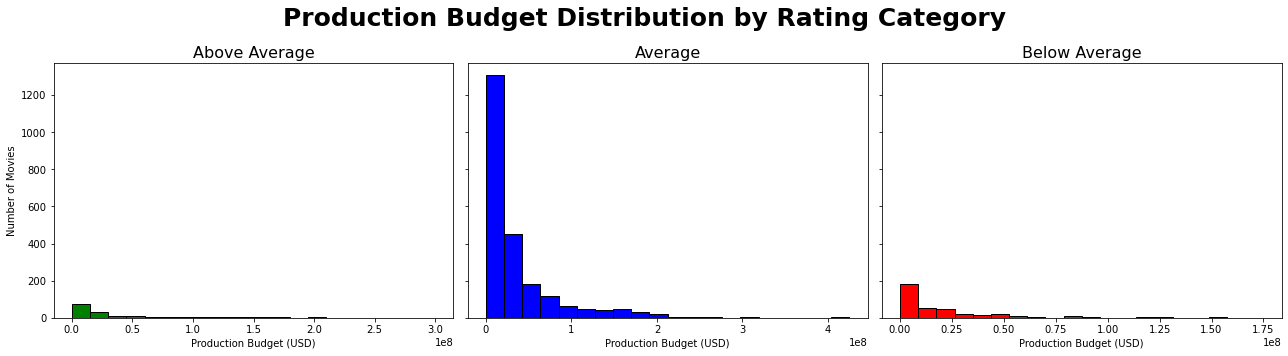

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=True)

# Above Average
axes[0].hist(above_avg_df['production_budget'], bins=20, color='green', edgecolor='black')
axes[0].set_title('Above Average', fontsize=16)
axes[0].set_xlabel('Production Budget (USD)')
axes[0].set_ylabel('Number of Movies')

# Average
axes[1].hist(avg_df['production_budget'], bins=20, color='blue', edgecolor='black')
axes[1].set_title('Average', fontsize=16)
axes[1].set_xlabel('Production Budget (USD)')

# Below Average
axes[2].hist(below_avg_df['production_budget'], bins=20, color='red', edgecolor='black')
axes[2].set_title('Below Average', fontsize=16)
axes[2].set_xlabel('Production Budget (USD)')

fig.suptitle('Production Budget Distribution by Rating Category', fontsize=25, fontweight='bold')

plt.tight_layout()
plt.show()

Studio Perfomance Analysi in both foreign and domestic markets

In [ ]:
gross_df2.info()
gross_df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2009 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   float64
 4   year            2009 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 78.6+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


Create domestic and foreign dfs. Let's have a clean df to analyze on.

In [ ]:
#create domestic df:drop foreign gross
domestic_gross_df = gross_df2.drop(columns='foreign_gross')
domestic_gross_df['studio'].fillna('Unknown', inplace=True)

domestic_gross_df.dropna(inplace=True,subset=['domestic_gross'])
domestic_gross_df.reset_index(drop=True, inplace=True)
domestic_gross_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2009 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   year            2009 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 62.9+ KB


In [ ]:
#create foreign df:drop domestic column and Nan values
foreign_gross_df = gross_df2.drop(columns='domestic_gross')
foreign_gross_df['studio'].fillna('Unknown', inplace=True)

foreign_gross_df.dropna(inplace=True,subset=['foreign_gross'])
foreign_gross_df.reset_index(drop=True, inplace=True)
foreign_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          2009 non-null   object 
 1   studio         2009 non-null   object 
 2   foreign_gross  2009 non-null   float64
 3   year           2009 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 62.9+ KB


Find the studio perfomance by checking how much they gross in domestic vs foreign markets.

In [ ]:
#domestic markets
studio_domestic_gross = domestic_gross_df.groupby('studio')['domestic_gross'].sum()
studio_domestic_gross = studio_domestic_gross.sort_values(ascending=False)
studio_domestic_gross.describe()


count    1.730000e+02
mean     5.454855e+08
std      2.284412e+09
min      8.000000e+02
25%      1.880000e+05
50%      2.000000e+06
75%      2.690000e+07
max      1.839653e+10
Name: domestic_gross, dtype: float64

In [ ]:
# foreign markets
studio_foreign_gross = foreign_gross_df.groupby('studio')['foreign_gross'].sum()
studio_foreign_gross = studio_foreign_gross.sort_values(ascending=False)
studio_foreign_gross.describe()

count    1.730000e+02
mean     8.792942e+08
std      3.425321e+09
min      5.200000e+03
25%      1.800000e+06
50%      1.788800e+07
75%      1.215000e+08
max      2.579385e+10
Name: foreign_gross, dtype: float64

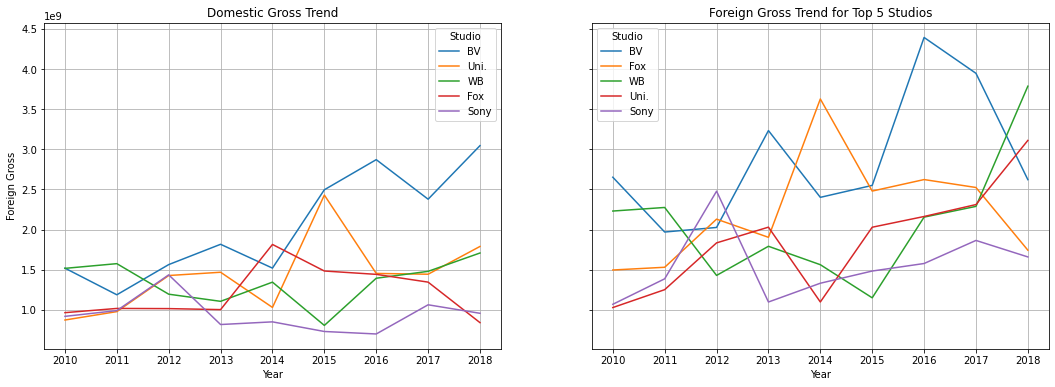

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(18,6), sharey=True)
#add domestic trend
domestic_studio_year = domestic_gross_df.groupby(['year', 'studio'])['domestic_gross'].sum().unstack()

domestic_top_studios = domestic_gross_df.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(5).index
domestic_studio_year[domestic_top_studios].plot(ax=axes[0])

axes[0].set_xlabel('Year')
axes[0].set_ylabel('Foreign Gross')
axes[0].set_title('Domestic Gross Trend')
axes[0].legend(title='Studio')
axes[0].grid(True)

#add foreign trend

foreign_studio_year = foreign_gross_df.groupby(['year', 'studio'])['foreign_gross'].sum().unstack()

foreign_top_studios = foreign_gross_df.groupby('studio')['foreign_gross'].sum().sort_values(ascending=False).head(5).index
foreign_studio_year[foreign_top_studios].plot(ax=axes[1])
plt.xlabel('Year')
plt.ylabel('Foreign gross')
plt.title('Foreign Gross Trend for Top 5 Studios')
plt.legend(title='Studio')


plt.grid(True)
plt.show()


Observation?